## Transfomer Proof of Concept Training

In [5]:
from src.data.make_dataset import make_mixed_dataset
from src.data.sampling_strategy import DefaultSamplingStrategy
import pytorch_lightning as pl
import numpy as np
from src.visualization.visualize import ModelPredictionVisualization
from src.models.lightning_models import Transformer, SeqToSeqCNN, SeqToSeqLSTM
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import ModelCheckpoint
from torch.nn import L1Loss


## Setting Dataset and Training Hyperparameters

In [6]:
# Dataset hyperparameters
sequence_length = 256 # total, input will be half
sample_size = 10000
sigma = 1
tvt_split = [0.5, 0.2, 0.3]
frequencies = [1 / 8, 1 / 32]  # high vs. low dynamics
delays = [0, 32]
sampling_strategy = DefaultSamplingStrategy(sequence_length=sequence_length,sigma=sigma)

# Training Hyperparameters
batch_size = 256
epochs = 100
loss_function = L1Loss()

# Model Hyperparameters
d_input=1
d_output=1
N=4
d_model=64
d_ff=2048
h=8
dropout=0.2

# fast dev runs for debugging
fast_dev_run = False

## Generation of Data

In [7]:
assert sum(tvt_split) == 1.0
datasets = []
for split_percentage in tvt_split:
    dataset = make_mixed_dataset(sequence_length, int(sample_size * split_percentage) , sampling_strategy,
                       frequencies, delays)
    datasets.append(dataset)

2021-07-30 14:10:39,276 - src.data - INFO - Shuffling dataset
2021-07-30 14:10:39,307 - src.data - INFO - Shuffling dataset
2021-07-30 14:10:39,338 - src.data - INFO - Shuffling dataset


## Start of Model Training

In [8]:
transformer = Transformer(
    batch_size=batch_size,
    train_dataset=datasets[0],
    val_dataset=datasets[1],
    test_dataset=datasets[2],
    loss_function=loss_function,
    d_input=1,
    d_output=1,
    N=N,
    d_model=d_model,
    d_ff=d_ff,
    h=h,
    dropout=dropout,
)

#transformer.example_input_array = torch.zeros([sequence_length // 2, 1])
logger = TensorBoardLogger("tb_logs", name="transformer")
checkpoint_callback = ModelCheckpoint(monitor='val_loss')
transformer_trainer = pl.Trainer(gpus=1, logger=logger, max_epochs=epochs, callbacks=[checkpoint_callback], fast_dev_run=fast_dev_run)

transformer.normalize_data()
transformer_trainer.fit(transformer, val_dataloaders=[transformer.val_dataloader()])
print(f"Best Model: {checkpoint_callback.best_model_path}")

2021-07-30 14:10:42,055 - src.models - INFO - Training size: 5000, Validation size: 2000
2021-07-30 14:10:42,055 - pytorch_lightning.utilities.distributed - INFO - GPU available: True, used: True
2021-07-30 14:10:42,055 - pytorch_lightning.utilities.distributed - INFO - TPU available: False, using: 0 TPU cores
2021-07-30 14:10:42,060 - src.data - INFO - Initializing and fitting new scaler to dataset
2021-07-30 14:10:42,065 - src.data - INFO - Using provided scaler to normalize dataset
2021-07-30 14:10:42,070 - src.data - INFO - Using provided scaler to normalize dataset
2021-07-30 14:10:42,085 - pytorch_lightning.accelerators.gpu - INFO - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2021-07-30 14:12:00,629 - pytorch_lightning.core.lightning - INFO - 
  | Name          | Type                   | Params
---------------------------------------------------------
0 | loss_function | L1Loss                 | 0     
1 | model         | EncoderOnlyTransformer | 1.1 M 
----------------------------

Validation sanity check: 0it [00:00, ?it/s]

C:\Users\Mischa\Anaconda3\envs\masterthesis\lib\site-packages\pytorch_lightning\trainer\data_loading.py:102: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\Mischa\Anaconda3\envs\masterthesis\lib\site-packages\pytorch_lightning\trainer\data_loading.py:102: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Best Model: tb_logs\transformer\version_0\checkpoints\epoch=80-step=1619.ckpt


## Testing Phase  and Visualizations of some predictions

2021-07-30 14:17:14,726 - pytorch_lightning.accelerators.gpu - INFO - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\Mischa\Anaconda3\envs\masterthesis\lib\site-packages\pytorch_lightning\trainer\data_loading.py:102: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_mae': 0.022375358268618584, 'test_rmse': 0.0334845595061779}
--------------------------------------------------------------------------------


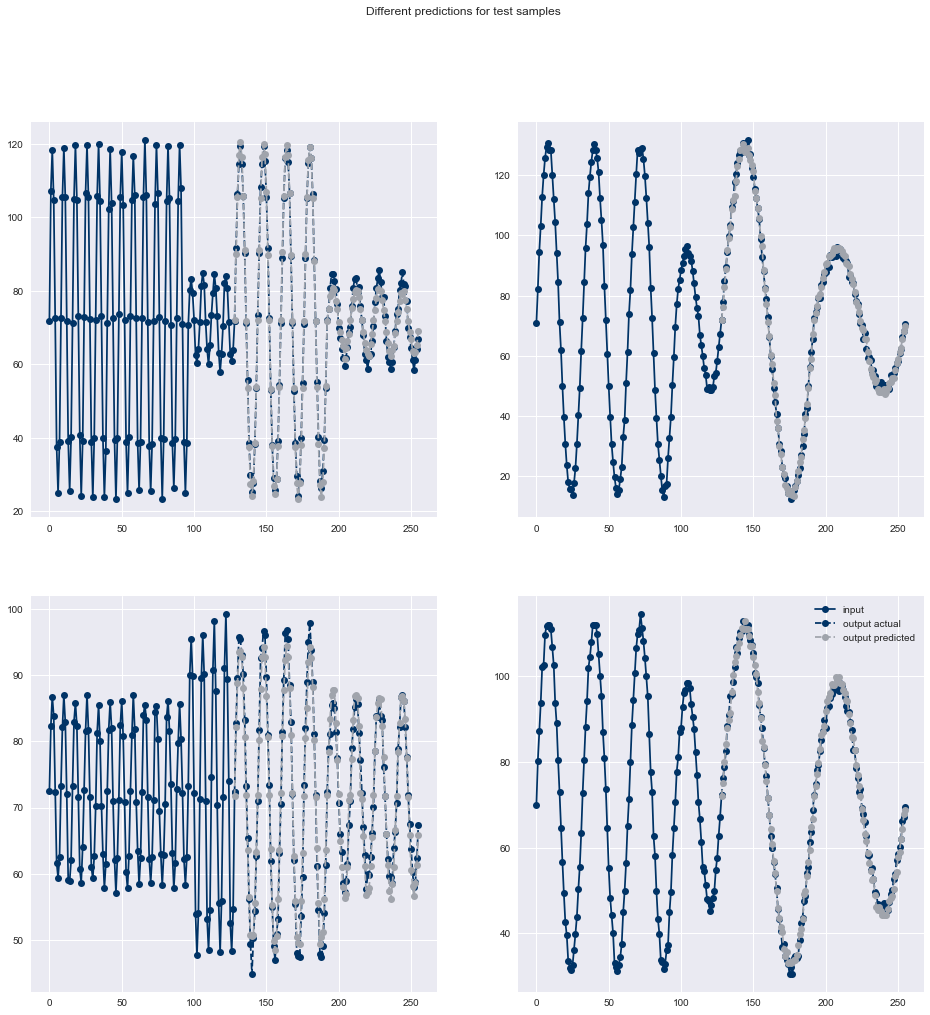

In [9]:
transformer_test = transformer_trainer.test(transformer)

def show_prediction(model, filename):
    test_samples = np.random.randint(0, len(dataset), size=4)
    inp_samples, outp_actual = dataset[test_samples]
    inp_len = len(inp_samples[0])
    outp_pred = model(inp_samples)
    outp_pred = outp_pred.to("cpu").detach().numpy().reshape(-1, inp_len)
    outp_actual = outp_actual.reshape(-1, inp_len)
    inp_samples = inp_samples.reshape(-1, inp_len)

    # inverse normalization
    inp_samples = dataset.inverse_normalization(data=inp_samples)
    outp_actual = dataset.inverse_normalization(data=outp_actual)
    outp_pred = dataset.inverse_normalization(data=outp_pred)

    # visualize the predictions
    viz = ModelPredictionVisualization(use_latex_font=False)
    viz.subplots(nrows=2, ncols=2, figsize=(16, 16))
    viz.plot(inp_samples, outp_actual, outp_pred, pred_starts=np.ones(16, dtype=int) * inp_len)
    viz.fig.suptitle("Different predictions for test samples")
    viz.plt.legend()
    viz.save(filename=filename)
    viz.plt.show()


show_prediction(transformer, "figures/transformer_prediction.pdf")

# Convolutional Neural Network Proof of Concept Training using TCN
Repeat the same thing for TCN

2021-07-30 14:17:16,283 - pytorch_lightning.utilities.distributed - INFO - GPU available: True, used: True
2021-07-30 14:17:16,284 - pytorch_lightning.utilities.distributed - INFO - TPU available: False, using: 0 TPU cores
2021-07-30 14:17:16,285 - src.data - INFO - Dataset already normalized
2021-07-30 14:17:16,286 - src.data - INFO - Initializing and fitting new scaler to dataset
2021-07-30 14:17:16,295 - src.data - INFO - Dataset already normalized
2021-07-30 14:17:16,295 - src.data - INFO - Using provided scaler to normalize dataset
2021-07-30 14:17:16,299 - src.data - INFO - Dataset already normalized
2021-07-30 14:17:16,300 - src.data - INFO - Using provided scaler to normalize dataset
2021-07-30 14:17:16,319 - pytorch_lightning.accelerators.gpu - INFO - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2021-07-30 14:18:37,178 - pytorch_lightning.core.lightning - INFO - 
  | Name          | Type   | Params
-----------------------------------------
0 | loss_function | L1Loss | 0     
1 | 

Validation sanity check: 0it [00:00, ?it/s]

C:\Users\Mischa\Anaconda3\envs\masterthesis\lib\site-packages\pytorch_lightning\trainer\data_loading.py:102: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\Mischa\Anaconda3\envs\masterthesis\lib\site-packages\pytorch_lightning\trainer\data_loading.py:102: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

2021-07-30 14:20:59,042 - pytorch_lightning.accelerators.gpu - INFO - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Best Model: tb_logs\s2s_cnn\version_0\checkpoints\epoch=93-step=1879.ckpt


C:\Users\Mischa\Anaconda3\envs\masterthesis\lib\site-packages\pytorch_lightning\trainer\data_loading.py:102: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_mae': 0.015205027535557747, 'test_rmse': 0.028182627633213997}
--------------------------------------------------------------------------------


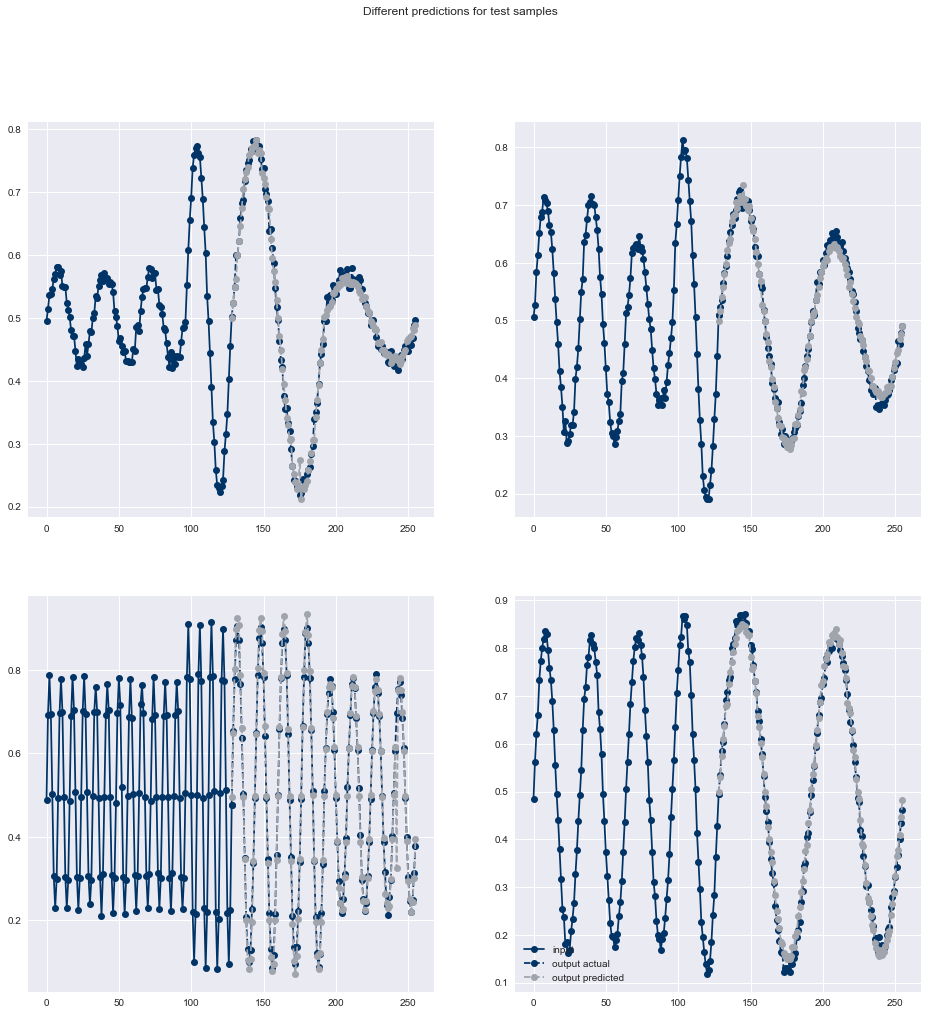

In [10]:
N = 10
kernel_size = 7
d_model = 64

s2s_cnn = SeqToSeqCNN(batch_size=batch_size,
                 N=N,
                 d_model=d_model,
                 kernel_size=kernel_size,
                 dropout=dropout,
                 train_dataset=datasets[0],
                 val_dataset=datasets[1],
                 test_dataset=datasets[2],
                 loss_function=loss_function
            )

logger = TensorBoardLogger("tb_logs", name="s2s_cnn")
checkpoint_callback = ModelCheckpoint(monitor='val_loss')
cnn_trainer = pl.Trainer(gpus=1, logger=logger, max_epochs=epochs, callbacks=[checkpoint_callback], fast_dev_run=fast_dev_run)

s2s_cnn.normalize_data()
cnn_trainer.fit(s2s_cnn, val_dataloaders=[s2s_cnn.val_dataloader()])
print(f"Best Model: {checkpoint_callback.best_model_path}")
cnn_test = cnn_trainer.test(s2s_cnn)

show_prediction(transformer, "figures/cnn_prediction.pdf")

# LSTM Proof of Concept Training
Repeat the same thing for LSTM

2021-07-30 14:21:00,105 - pytorch_lightning.utilities.distributed - INFO - GPU available: True, used: True
2021-07-30 14:21:00,105 - pytorch_lightning.utilities.distributed - INFO - TPU available: False, using: 0 TPU cores
2021-07-30 14:21:00,106 - src.data - INFO - Dataset already normalized
2021-07-30 14:21:00,107 - src.data - INFO - Initializing and fitting new scaler to dataset
2021-07-30 14:21:00,115 - src.data - INFO - Dataset already normalized
2021-07-30 14:21:00,115 - src.data - INFO - Using provided scaler to normalize dataset
2021-07-30 14:21:00,118 - src.data - INFO - Dataset already normalized
2021-07-30 14:21:00,119 - src.data - INFO - Using provided scaler to normalize dataset
2021-07-30 14:21:00,140 - pytorch_lightning.accelerators.gpu - INFO - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2021-07-30 14:22:17,855 - pytorch_lightning.core.lightning - INFO - 
  | Name          | Type               | Params
-----------------------------------------------------
0 | loss_functio

Validation sanity check: 0it [00:00, ?it/s]

C:\Users\Mischa\Anaconda3\envs\masterthesis\lib\site-packages\pytorch_lightning\trainer\data_loading.py:102: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\Mischa\Anaconda3\envs\masterthesis\lib\site-packages\pytorch_lightning\trainer\data_loading.py:102: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

2021-07-30 14:27:16,499 - pytorch_lightning.accelerators.gpu - INFO - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Best Model: tb_logs\s2s_lstm\version_0\checkpoints\epoch=98-step=1979.ckpt


C:\Users\Mischa\Anaconda3\envs\masterthesis\lib\site-packages\pytorch_lightning\trainer\data_loading.py:102: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_mae': 0.04715586453676224, 'test_rmse': 0.06588339060544968}
--------------------------------------------------------------------------------


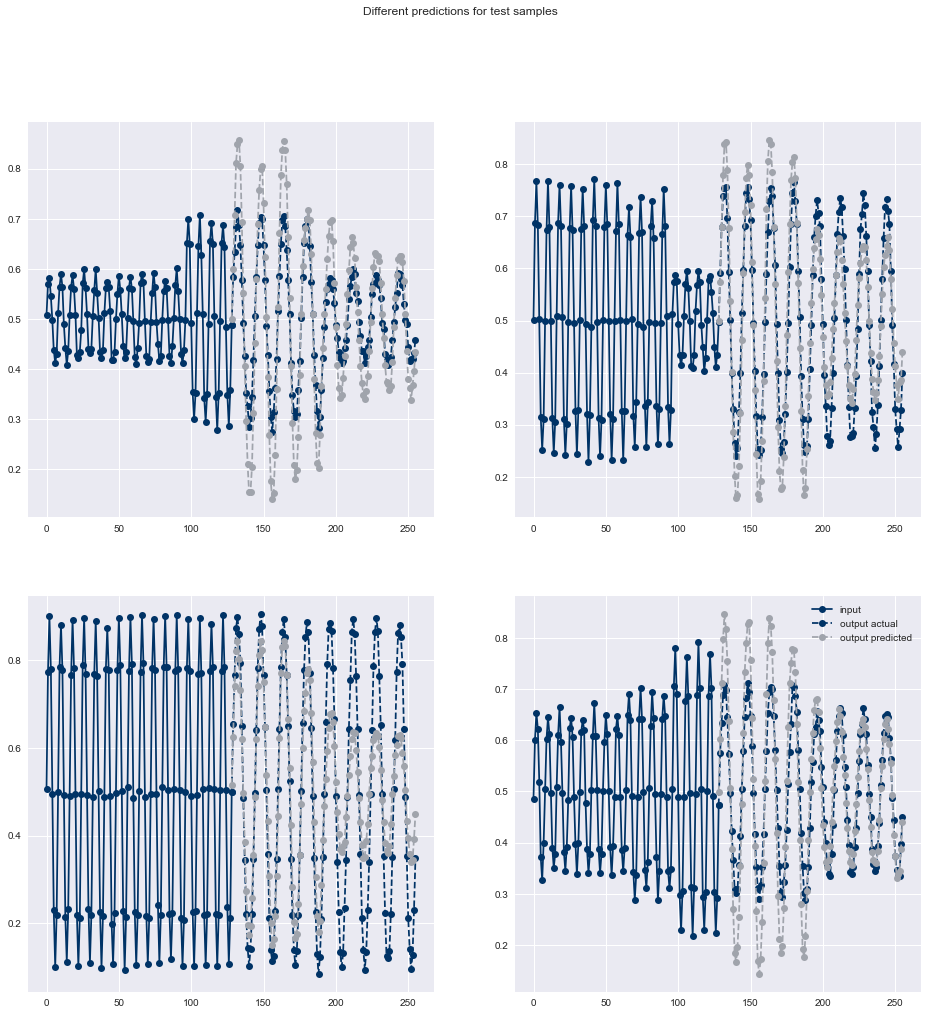

In [11]:
N = 5
d_model = 64
d_projection = 10

s2s_lstm = SeqToSeqLSTM(
        batch_size=batch_size,
        N=N,
        dropout=dropout,
        d_model=d_model,
        d_input=1,
        d_output=1,
        d_projection=d_projection,
        loss_function=loss_function,
        train_dataset=datasets[0],
        val_dataset=datasets[1],
        test_dataset=datasets[2]
    )

logger = TensorBoardLogger("tb_logs", name="s2s_lstm")
checkpoint_callback = ModelCheckpoint(monitor='val_loss')
lstm_trainer = pl.Trainer(gpus=1, logger=logger, max_epochs=epochs, callbacks=[checkpoint_callback], fast_dev_run=fast_dev_run)

s2s_lstm.normalize_data()
lstm_trainer.fit(s2s_lstm, val_dataloaders=[s2s_lstm.val_dataloader()])
print(f"Best Model: {checkpoint_callback.best_model_path}")
lstm_test = lstm_trainer.test(s2s_lstm)

show_prediction(s2s_lstm, "lstm_prediction.pdf")

# Summary

In [12]:

print(transformer_test)
print(cnn_test)
print(lstm_test)

[{'test_mae': 0.022375358268618584, 'test_rmse': 0.0334845595061779}]
[{'test_mae': 0.015205027535557747, 'test_rmse': 0.028182627633213997}]
[{'test_mae': 0.04715586453676224, 'test_rmse': 0.06588339060544968}]
